# 1. Introduction

Survival Analysis is a set of statistical tools, which addresses questions such as ‘how long would it be, before a particular event occurs’; in other words we can also call it as a ‘time to event’ analysis.

# 2. Definitions

In order to understand the definition of time and event, we will define the time and event for various use cases in industry.

1. **Predictive Maintenance in Mechanical Operations:** Survival Analysis applies to mechanical parts/ machines to answer about ‘how long will the machine last?’. Predictive Maintenance is one of its applications. Here, Event is defined as the time at which the machine breaks down. Time of origin is defined as the time of start of machine for the continuous operations. Along with the definition of time we should also define time scale (time scale could be weeks, days, hours..). The difference between the time of event and the time origin gives us the time to event.
2. **Customer Analytics (Customer Retention):** With the help of Survival Analysis we can focus on churn prevention efforts of high-value customers with low survival time. This analysis also helps us to calculate Customer Life Time Value. In this use case, Event is defined as the time at which the customer churns / unsubscribe. Time of origin is defined as the time at which the customer starts the service/subscription with a company. Time scale could be months, or weeks. The difference between the time of event and the time origin gives us the time to event.
3. **Marketing Analytics (Cohort Analysis):** Survival Analysis evaluates the retention rates of each marketing channel. In this use case, Event is defined as the time at which the customer unsubscribe a marketing channel. Time of origin is defined as the time at which the customer starts the service / subscription of a marketing channel. Time scale could be months, or weeks.
4. **Actuaries:** Given the risks of a population, survival analysis evaluates the probability of the population to die in a particular time range. This analysis helps the insurance companies to evaluate the insurance premiums. Guess, the event and time definition for this use case!!!

# 3. Kaplan-Meier Estimate

There are two main methods to estimate the survival curve. The ﬁrst method is a parametric approach. This method assumes a parametric model, which is based on certain distribution such as exponential distribution, then we estimate the parameter, and then finally form the estimator of the survival function. A second approach is a powerful **non-parametric method called the Kaplan-Meier estimator**. We will discuss it in this section. In this section we will also try to create the Kaplan-Meier curve manually as well as by using the Python library [lifelines](https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html).

## 3.1. Simple Example

<img src="images/1_NfYjSmifXEbLyb7XgZEaVA.webp" style="width:500px;height:300px;background-color:white">

In [1]:
from lifelines import KaplanMeierFitter

In [2]:
# Example Data
durations = [5, 6, 6, 2.5, 4, 4]
event_observed = [1, 0, 0, 1, 1, 1]

In [3]:
# create a kmf object
kmf = KaplanMeierFitter()

In [4]:
# Fit the data into the model
kmf.fit(durations, event_observed, label="Kaplan Meier Estimate")

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate", fitted with 6 total observations, 2 right-censored observations>

<AxesSubplot: xlabel='timeline'>

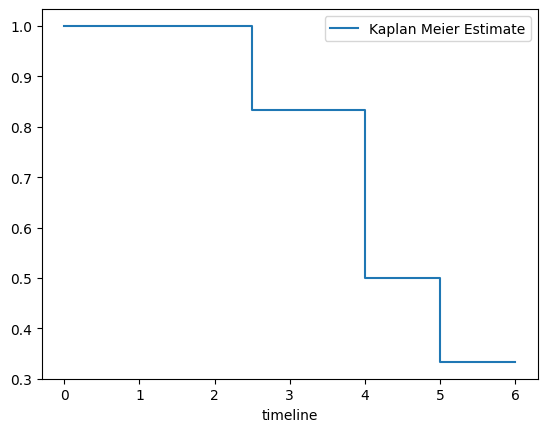

In [5]:
# Create an estimate
kmf.plot(ci_show=False)

## 3.2. Real World Example

As mentioned earlier that Survival Analysis can be used for the cohort analysis, to gain insights. So, here we will be using the [Telco-Customer-Churn data set](https://www.kaggle.com/datasets/blastchar/telco-customer-churn), to gain insight about the lifelines of customers in different cohorts.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [7]:
#  create a dataframe
df = pd.read_csv("data\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
# Data Types and Missing Values in Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Replace yes and No in the Churn column to 1 and 0. 1 for the event and 0 for the censured data.
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [11]:
# after converting the column TotalCharges to numeric
df.info()  # Column TotalCharges is having missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# Impute the null value with the median value

df.TotalCharges.fillna(value=df["TotalCharges"].median(), inplace=True)

In [13]:
# Create a list of Categorical Columns
cat_cols = [i for i in df.columns if df[i].dtype == object]
cat_cols.remove(
    "customerID"
)  # customerID has been removed because it is unique for all the rows.

In [14]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [15]:
# lets have a look at the categories and their distribution in all the categorical columns.

for i in cat_cols:
    print("Column Name: ", i)
    print(df[i].value_counts())
    print("-----------------------------")

Column Name:  gender
Male      3555
Female    3488
Name: gender, dtype: int64
-----------------------------
Column Name:  Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
-----------------------------
Column Name:  Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
-----------------------------
Column Name:  PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
-----------------------------
Column Name:  MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-----------------------------
Column Name:  InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-----------------------------
Column Name:  OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
-----------------------------
Column Name:  OnlineBackup
No                     3088
Yes     

### 3.2.1. Overall KaplanMeier curve, without breaking it into groups of covariates.

In [16]:
durations = df["tenure"]  # Time to event data of censored and event data
event_observed = df["Churn"]  # It has the churned (1) and censored is (0)

In [17]:
durations

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [18]:
event_observed

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [19]:
# create a kmf object as km
km = KaplanMeierFitter()  # instantiate the class to create an object

In [20]:
# Fit the data into the model
km.fit(durations, event_observed, label="Kaplan Meier Estimate")

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate", fitted with 7043 total observations, 5174 right-censored observations>

<AxesSubplot: xlabel='timeline'>

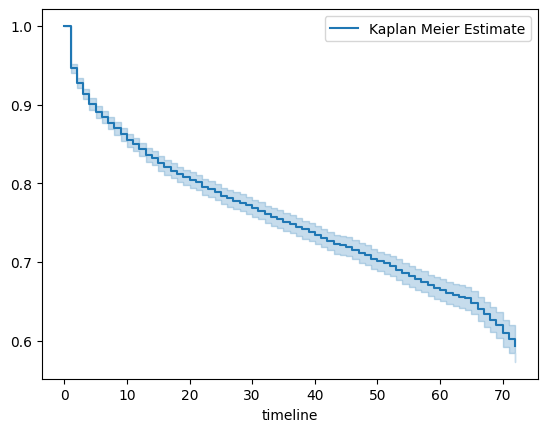

In [21]:
# Create an estimate
km.plot()

### 3.2.2. Kaplan Meier Curves for Cohorts

In [22]:
kmf = KaplanMeierFitter()

T = df["tenure"]  # time to event
E = df["Churn"]  # event occurred or censored

In [23]:
groups = df["Contract"]  # Create the cohorts from the 'Contract' column
ix1 = groups == "Month-to-month"  # Cohort 1 index
ix2 = groups == "Two year"  # Cohort 2 index
ix3 = groups == "One year"  # Cohort 3 index

<AxesSubplot: xlabel='timeline'>

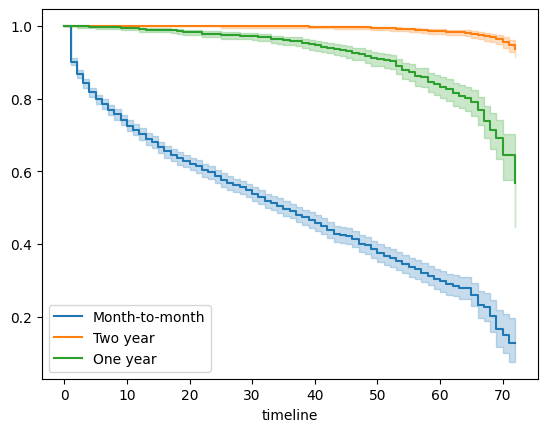

In [24]:
kmf.fit(T[ix1], E[ix1], label="Month-to-month")  # fit the cohort 1 data
ax = kmf.plot()

kmf.fit(T[ix2], E[ix2], label="Two year")  # fit the cohort 2 data
ax1 = kmf.plot(ax=ax)

kmf.fit(T[ix3], E[ix3], label="One year")  # fit the cohort 3 data
kmf.plot(ax=ax1)

<AxesSubplot: xlabel='timeline'>

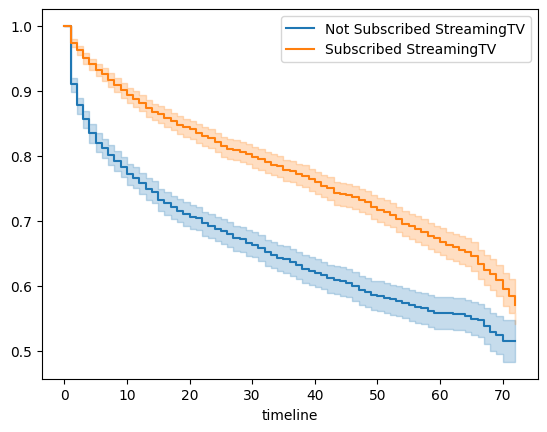

In [25]:
kmf1 = KaplanMeierFitter()  # instantiate the class to create an object

# Two Cohorts are compared.
# 1. Streaming TV Not Subsribed by Users, 2. Streaming TV subscribed by the users.
groups = df["StreamingTV"]
i1 = groups == "No"  # group i1 , having the pandas series for the 1st cohort
i2 = groups == "Yes"  # group i2 , having the pandas series for the 2nd cohort


# fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label="Not Subscribed StreamingTV")
a1 = kmf1.plot()

# fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label="Subscribed StreamingTV")
kmf1.plot(ax=a1)

# 4. Cox Proportional Hazard Model (Survival Regression)

In [26]:
from lifelines import CoxPHFitter

In [27]:
# My objective here is to introduce you to the implementation of the model.
# Thus taking subset of the columns to train the model.
# Only using the subset of the columns present in the original data
df_r = df.loc[
    :,
    [
        "tenure",
        "Churn",
        "gender",
        "Partner",
        "Dependents",
        "PhoneService",
        "MonthlyCharges",
        "SeniorCitizen",
        "StreamingTV",
    ],
]
df_r.head()  # have a look at the data

,tenure,Churn,gender,Partner,Dependents,PhoneService,MonthlyCharges,SeniorCitizen,StreamingTV
0,1,0,Female,Yes,No,No,29.85,0,No
1,34,0,Male,No,No,Yes,56.95,0,No
2,2,1,Male,No,No,Yes,53.85,0,No
3,45,0,Male,No,No,No,42.30,0,No
4,2,1,Female,No,No,Yes,70.70,0,No


In [28]:
# Create dummy variables
df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,29.85,0,0,1,0,0,0,0
1,34,0,56.95,0,1,0,0,1,0,0
2,2,1,53.85,0,1,0,0,1,0,0
3,45,0,42.30,0,1,0,0,0,0,0
4,2,1,70.70,0,0,0,0,1,0,0


In [29]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()  # Instantiate the class to create a cph object

In [30]:
cph.fit(df_dummy, duration_col="tenure", event_col="Churn")  # Fit the data to train the model
cph.print_summary()  # HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -15182.39
         time fit was run = 2023-04-25 12:56:57 UTC

---
                                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                               
MonthlyCharges                   -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
SeniorCitizen                     0.40       1.49       0.06             0.29             0.50                 1.33                 1.66
gender_Male                      -0.01       0.99       0.05            -0.10             0.08                 0.90                 1.08
Partner_Yes                      -0.81       0.45       0.05            -0.92            -0.70                 0.40                 0.50
Dependents_Yes                   -0.36       0.70       0.07            -0.49            -0.22                 0.61                 0.80
PhoneService_Yes                  0.69       2.00       0.10             0.49             0.90                 1.63                 2.45
StreamingTV_No internet service  -2.10       0.12       0.13            -2.36            -1.84                 0.09                 0.16
StreamingTV_Yes                  -0.19       0.83       0.06            -0.31            -0.07                 0.73                 0.93

                                  cmp to      z      p   -log2(p)
covariate                                                        
MonthlyCharges                      0.00  -6.13 <0.005      30.06
SeniorCitizen                       0.00   7.16 <0.005      40.15
gender_Male                         0.00  -0.23   0.82       0.29
Partner_Yes                         0.00 -14.93 <0.005     164.98
Dependents_Yes                      0.00  -5.21 <0.005      22.37
PhoneService_Yes                    0.00   6.65 <0.005      34.96
StreamingTV_No internet service     0.00 -15.79 <0.005     184.09
StreamingTV_Yes                     0.00  -3.10 <0.005       9.03
---
Concordance = 0.71
Partial AIC = 30380.78
log-likelihood ratio test = 941.30 on 8 df
-log2(p) of ll-ratio test = 654.95

<AxesSubplot: xlabel='log(HR) (95% CI)'>

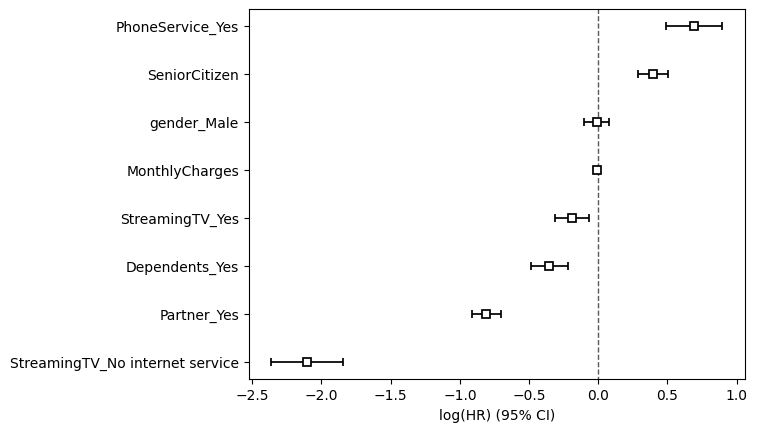

In [31]:
cph.plot()

The summary statistics above indicates the significance of the covariates in predicting the churn risk. Gender doesn’t play any significant role in predicting the churn, whereas all the other covariates are significant.

***Interesting point** to note here is that , the β (coef ) values in case of covariates MonthlyCharges and gender_Male is approximately zero (~-0.01), but still the MonthlyCharges plays a significant role in predicting churn , while the latter is insignificant. The reason is that the MonthlyCharges is continuous value and it can vary from the order of tens, hundreds to thousands, when multiplied by the small coef (β=-0.01), it becomes significant. On the other hand, the covariate gender can only take the value 0 or 1, and in both the cases [exp(-0.01 * 0), exp(-0.01*1)] it will be insignificant.*

In [32]:
# Check all the methods and attributes associated with the cph object.
dir(cph)

['AIC_',
 'AIC_partial_',
 '_ALLOWED_RESIDUALS',
 '_FAST_MEDIAN_PREDICT',
 '_KNOWN_MODEL',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_batch_mode',
 '_censoring_type',
 '_central_values',
 '_check_values_post_fitting',
 '_check_values_pre_fitting',
 '_choose_gradient_calculator',
 '_class_name',
 '_clusters',
 '_compute_baseline_cumulative_hazard',
 '_compute_baseline_hazard',
 '_compute_baseline_hazards',
 '_compute_baseline_survival',
 '_compute_central_values_of_raw_training_data',
 '_compute_confidence_intervals',
 '_compute_delta_beta',
 '_compute_deviance',
 '_compute_martingale',
 '_compute_p_values',
 '_compute_sandwich_estimator',
 '_

In [33]:
# We want to see the Survival curve at the customer level.
# Therefore, we have selected 6 customers (rows 5 till 9).

tr_rows = df_dummy.iloc[5:10, 2:]
tr_rows

,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
5,99.65,0,0,0,0,1,0,1
6,89.10,0,1,0,1,1,0,1
7,29.75,0,0,0,0,0,0,0
8,104.80,0,0,1,0,1,0,1
9,56.15,0,1,0,1,1,0,0


<AxesSubplot: >

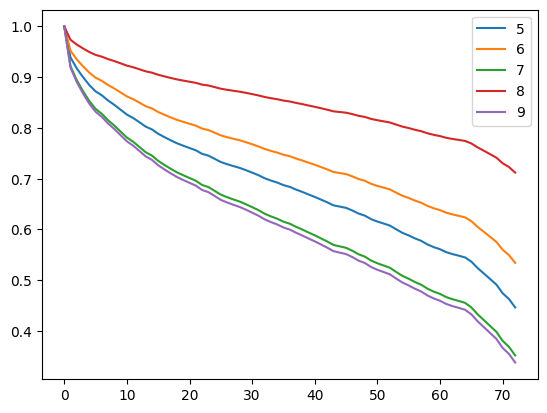

In [34]:
# Lets predict the survival curve for the selected customers. 
# Customers can be identified with the help of the number mentioned against each curve.
cph.predict_survival_function(tr_rows).plot()

Creating the survival curves at each customer level helps us in proactively creating a tailor made strategy for high-valued customers for different survival risk segments along the timeline.

# 5. End Note

Though, there are many other things which are still remaining to be covered in survival analysis such as ‘[checking proportionality assumption](https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Checking-assumptions-with-check_assumptions)’, & ‘[model selection](https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html#model-selection-in-survival-regression)’ ; however, with a basic understanding of the mathematics behind the analysis, and the basic implementation of the survival analysis (using the lifelines package in python) will help us in implementing this model in any pertinent business use case.